In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("raw_data.csv")
df

Unnamed: 0  Crop  Crop_Year       Season              State       Area  \
0              0  Rice       1997  Autumn                   Assam   607358.0   
1              1  Rice       1997  Summer                   Assam   174974.0   
2              2  Rice       1997  Winter                   Assam  1743321.0   
3              3  Rice       1997  Kharif               Karnataka  1031530.0   
4              4  Rice       1997  Rabi                 Karnataka    53889.0   
...          ...   ...        ...          ...                ...        ...   
1192        1192  Rice       2018  Autumn                  Odisha   454370.0   
1193        1193  Rice       2018  Summer                  Odisha   274230.0   
1194        1194  Rice       2018  Winter                  Odisha  3130820.0   
1195        1195  Rice       1998  Kharif                Nagaland   141000.0   
1196        1196  Rice       1997  Kharif       Jammu and Kashmir   275746.0   

      Production  Annual_Rainfall    Fertilizer   Pesticide  ...   wspd_avg  \
0         398311           2051.4  5.780226e+07   188280.98  ...        NaN   
1         209623           2051.4  1.665228e+07    54241.94  ...        NaN   
2        1647296           2051.4  1.659119e+08   540429.51  ...        NaN   
3        2340493           1266.7  9.817071e+07   319774.30  ...  12.981818   
4         109350           1266.7  5.128616e+06    16705.59  ...  12.981818   
...          ...              ...           ...         ...  ...        ...   
1192      527490           1635.9  7.369881e+07   159029.50  ...        NaN   
1193      925810           1635.9  4.448011e+07    95980.50  ...        NaN   
1194     6280410           1635.9  5.078190e+08  1095787.00  ...        NaN   
1195      205000           1498.0  1.393080e+07    40890.00  ...        NaN   
1196        5488           1356.2  2.624275e+07    85481.26  ...        NaN   

         pres_avg          CO        NO        NO2         O3       SO2  \
0             NaN  374.501098  0.016470   1.000221  30.433663  0.864985   
1             NaN  374.501098  0.016470   1.000221  30.433663  0.864985   
2             NaN  374.501098  0.016470   1.000221  30.433663  0.864985   
3     1011.172727  337.693601  0.182891   4.914653  55.254451  2.337770   
4     1011.172727  337.693601  0.182891   4.914653  55.254451  2.337770   
...           ...         ...       ...        ...        ...       ...   
1192          NaN  431.167345  0.170650   5.405914  53.132558  5.117803   
1193          NaN  431.167345  0.170650   5.405914  53.132558  5.117803   
1194          NaN  431.167345  0.170650   5.405914  53.132558  5.117803   
1195          NaN  328.611851  0.044295   2.185430  35.886474  0.809673   
1196          NaN  606.389054  0.838568  16.003795  62.143157  2.316830   

           PM25       PM10        NH3  
0     25.162719  28.445155   4.410782  
1     25.162719  28.445155   4.410782  
2     25.162719  28.445155   4.410782  
3     25.286665  30.029442   3.503258  
4     25.286665  30.029442   3.503258  
...         ...        ...        ...  
1192  61.173185  68.130309   3.772940  
1193  61.173185  68.130309   3.772940  
1194  61.173185  68.130309   3.772940  
1195  19.575835  22.555509   2.803836  
1196  37.433109  46.301135  13.926056  

[1197 rows x 27 columns]

In [3]:
df = df.drop(columns = ["Unnamed: 0"])

In [4]:
df.shape

(1197, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             1197 non-null   object 
 1   Crop_Year        1197 non-null   int64  
 2   Season           1197 non-null   object 
 3   State            1197 non-null   object 
 4   Area             1197 non-null   float64
 5   Production       1197 non-null   int64  
 6   Annual_Rainfall  1197 non-null   float64
 7   Fertilizer       1197 non-null   float64
 8   Pesticide        1197 non-null   float64
 9   Yield            1197 non-null   float64
 10  Latitude         1197 non-null   float64
 11  Longitude        1197 non-null   float64
 12  temp_avg         520 non-null    float64
 13  temp_min_avg     520 non-null    float64
 14  temp_max_avg     520 non-null    float64
 15  prcp_avg         520 non-null    float64
 16  wspd_avg         520 non-null    float64
 17  pres_avg      

In [6]:
df.isnull().sum()

Crop                 0
Crop_Year            0
Season               0
State                0
Area                 0
Production           0
Annual_Rainfall      0
Fertilizer           0
Pesticide            0
Yield                0
Latitude             0
Longitude            0
temp_avg           677
temp_min_avg       677
temp_max_avg       677
prcp_avg           677
wspd_avg           677
pres_avg           677
CO                   0
NO                   0
NO2                  0
O3                   0
SO2                  0
PM25                 0
PM10                 0
NH3                  0
dtype: int64

In [7]:
df.drop(['temp_avg','temp_min_avg','temp_max_avg','prcp_avg','wspd_avg','pres_avg'],axis=1,inplace=True)

In [8]:
df.head(5)

Crop  Crop_Year       Season      State       Area  Production  \
0  Rice       1997  Autumn           Assam   607358.0      398311   
1  Rice       1997  Summer           Assam   174974.0      209623   
2  Rice       1997  Winter           Assam  1743321.0     1647296   
3  Rice       1997  Kharif       Karnataka  1031530.0     2340493   
4  Rice       1997  Rabi         Karnataka    53889.0      109350   

   Annual_Rainfall    Fertilizer  Pesticide     Yield   Latitude  Longitude  \
0           2051.4  5.780226e+07  188280.98  0.780870  26.407384  93.255130   
1           2051.4  1.665228e+07   54241.94  1.060435  26.407384  93.255130   
2           2051.4  1.659119e+08  540429.51  0.941304  26.407384  93.255130   
3           1266.7  9.817071e+07  319774.30  2.233500  14.520390  75.722352   
4           1266.7  5.128616e+06   16705.59  2.073846  14.520390  75.722352   

           CO        NO       NO2         O3       SO2       PM25       PM10  \
0  374.501098  0.016470  1.000221  30.433663  0.864985  25.162719  28.445155   
1  374.501098  0.016470  1.000221  30.433663  0.864985  25.162719  28.445155   
2  374.501098  0.016470  1.000221  30.433663  0.864985  25.162719  28.445155   
3  337.693601  0.182891  4.914653  55.254451  2.337770  25.286665  30.029442   
4  337.693601  0.182891  4.914653  55.254451  2.337770  25.286665  30.029442   

        NH3  
0  4.410782  
1  4.410782  
2  4.410782  
3  3.503258  
4  3.503258

In [9]:
df["Season"].value_counts()

Kharif         505
Summer         244
Autumn         158
Winter         147
Rabi           139
Whole Year       4
Name: Season, dtype: int64

In [10]:
df["Season"].values[400:500]

array(['Summer     ', 'Winter     ', 'Autumn     ', 'Summer     ',
       'Winter     ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     ', 'Whole Year ', 'Kharif     ',
       'Summer     ', 'Whole Year ', 'Kharif     ', 'Kharif     ',
       'Summer     ', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Winter     ', 'Kharif     ', 'Kharif     ', 'Kharif     ',
       'Kharif     ', 'Kharif     ', 'Summer     ', 'Kharif     ',
       'Kharif     ', 'Kharif     ', 'Kharif     ', 'Summer     ',
       'Kharif     ', 'Summer     ', 'Kharif     ', 'Kharif     ',
       'Kharif     ', 'Kharif     ', 'Rabi       ', 'Summer     ',
       'Kharif     ', 'Kharif     ', 'Summer     ', 'Kharif     ',
       'Autumn     ', 'Summer     ', 'Winter     ', 'Kharif     ',
       'Kharif     ', 'Kharif     ', 'Summer     ', 'Autumn     ',
       'Kharif     ', 'Summer     ', 'Kharif     ', 'Kharif     ',
       'Summer     ', 'Kharif     ', 'Kharif     ', 'Kharif   

In [11]:
df1_whole_year=df[df['Season'] == "Whole Year "]

In [12]:
df1_whole_year

Crop  Crop_Year       Season           State       Area  Production  \
410  Rice       1997  Whole Year          Gujarat   672600.0     1042300   
413  Rice       1997  Whole Year          Mizoram    68114.0      110573   
581  Rice       2005  Whole Year          Mizoram    56460.0      107740   
682  Rice       2009  Whole Year   Madhya Pradesh  1593071.0     1355660   

     Annual_Rainfall    Fertilizer  Pesticide     Yield   Latitude  Longitude  \
410            798.9  6.401134e+07  208506.00  1.665000  22.385005  71.745261   
413           2644.2  6.482409e+06   21115.34  1.600000  23.214617  92.868761   
581           2075.4  6.770683e+06   11856.60  1.942500  23.214617  92.868761   
682            904.1  2.482323e+08  270822.07  0.906042  23.814342  77.534072   

             CO        NO       NO2         O3       SO2       PM25  \
410  331.262396  0.150302  4.389602  69.206029  5.030666  31.715338   
413  306.298180  0.902333  5.137790  29.288632  0.719798  23.915589   
581  306.298180  0.902333  5.137790  29.288632  0.719798  23.915589   
682  389.962940  0.120481  4.516140  60.062199  2.765778  37.894981   

          PM10        NH3  
410  47.771868   2.402378  
413  26.062062   2.078209  
581  26.062062   2.078209  
682  47.772795  10.116783

#  Crop Production in winter Season

In [13]:
df1_winter=df[df['Season'] == 'Winter     ']

In [14]:
df1_winter.head()

Crop  Crop_Year       Season        State       Area  Production  \
2   Rice       1997  Winter             Assam  1743321.0     1647296   
9   Rice       1997  Winter       West Bengal  4270328.0     8915100   
15  Rice       1998  Winter             Assam  1635230.0     2288114   
23  Rice       1998  Winter            Kerala   174714.0      346022   
27  Rice       1998  Winter       West Bengal  4028620.0     7653780   

    Annual_Rainfall   Fertilizer   Pesticide     Yield   Latitude  Longitude  \
2            2051.4  165911859.6   540429.51  0.941304  26.407384  93.255130   
9            1852.9  406407115.8  1323801.68  1.985556  22.996495  87.685588   
15           2354.4  161560724.0   474216.70  1.395652  26.407384  93.255130   
23           3151.5   17261743.2    50667.06  1.937143  10.352874  76.512040   
27           2152.5  398027656.0  1168299.80  1.781667  22.996495  87.685588   

            CO        NO        NO2         O3        SO2        PM25  \
2   374.501098  0.016470   1.000221  30.433663   0.864985   25.162719   
9   863.241207  1.066912  16.099537  68.919911  15.009459  112.287653   
15  374.501098  0.016470   1.000221  30.433663   0.864985   25.162719   
23  455.278105  0.155782   5.856900  27.001173   3.313614   29.182716   
27  863.241207  1.066912  16.099537  68.919911  15.009459  112.287653   

          PM10        NH3  
2    28.445155   4.410782  
9   129.609099  12.095501  
15   28.445155   4.410782  
23   37.588961   7.370291  
27  129.609099  12.095501

In [15]:
df1_winter_ = df1_winter.drop(columns = ["Crop_Year"])

In [16]:
df1_winter_

Crop       Season        State       Area  Production  Annual_Rainfall  \
2     Rice  Winter             Assam  1743321.0     1647296           2051.4   
9     Rice  Winter       West Bengal  4270328.0     8915100           1852.9   
15    Rice  Winter             Assam  1635230.0     2288114           2354.4   
23    Rice  Winter            Kerala   174714.0      346022           3151.5   
27    Rice  Winter       West Bengal  4028620.0     7653780           2152.5   
...    ...          ...          ...        ...         ...              ...   
1182  Rice  Winter            Odisha  3282000.0     7802000           1536.9   
1185  Rice  Winter            Odisha  3167000.0     4702000           1210.1   
1188  Rice  Winter            Odisha  3226450.0     8343100           1460.5   
1191  Rice  Winter            Odisha  3014130.0     5279130           1344.4   
1194  Rice  Winter            Odisha  3130820.0     6280410           1635.9   

       Fertilizer   Pesticide     Yield   Latitude  Longitude          CO  \
2     165911859.6   540429.51  0.941304  26.407384  93.255130  374.501098   
9     406407115.8  1323801.68  1.985556  22.996495  87.685588  863.241207   
15    161560724.0   474216.70  1.395652  26.407384  93.255130  374.501098   
23     17261743.2    50667.06  1.937143  10.352874  76.512040  455.278105   
27    398027656.0  1168299.80  1.781667  22.996495  87.685588  863.241207   
...           ...         ...       ...        ...        ...         ...   
1182  495450720.0  1083060.00  2.379333  20.543124  84.689732  431.167345   
1185  500100970.0  1045110.00  1.417667  20.543124  84.689732  431.167345   
1188  494453462.5  1129257.50  2.543000  20.543124  84.689732  431.167345   
1191  474544627.2  1145369.40  1.747000  20.543124  84.689732  431.167345   
1194  507819004.0  1095787.00  1.982333  20.543124  84.689732  431.167345   

            NO        NO2         O3        SO2        PM25        PM10  \
2     0.016470   1.000221  30.433663   0.864985   25.162719   28.445155   
9     1.066912  16.099537  68.919911  15.009459  112.287653  129.609099   
15    0.016470   1.000221  30.433663   0.864985   25.162719   28.445155   
23    0.155782   5.856900  27.001173   3.313614   29.182716   37.588961   
27    1.066912  16.099537  68.919911  15.009459  112.287653  129.609099   
...        ...        ...        ...        ...         ...         ...   
1182  0.170650   5.405914  53.132558   5.117803   61.173185   68.130309   
1185  0.170650   5.405914  53.132558   5.117803   61.173185   68.130309   
1188  0.170650   5.405914  53.132558   5.117803   61.173185   68.130309   
1191  0.170650   5.405914  53.132558   5.117803   61.173185   68.130309   
1194  0.170650   5.405914  53.132558   5.117803   61.173185   68.130309   

            NH3  
2      4.410782  
9     12.095501  
15     4.410782  
23     7.370291  
27    12.095501  
...         ...  
1182   3.772940  
1185   3.772940  
1188   3.772940  
1191   3.772940  
1194   3.772940  

[147 rows x 19 columns]

In [17]:
group_country = df1_winter_.groupby('State').mean().reset_index()

In [18]:
group_country

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO        NO  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  0.016470   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  1.213082   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  0.427740   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  0.155782   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  4.524936   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  0.101559   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  0.170650   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  0.366987   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  0.336609   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  0.035640   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  1.066912   

          NO2         O3        SO2        PM25        PM10        NH3  
0    1.000221  30.433663   0.864985   25.162719   28.445155   4.410782  
1   19.086455  79.709216  14.555726  148.400321  170.348135  15.250610  
2    9.430829  77.864641  11.925418   60.137722   69.740120   5.963411  
3    5.856900  27.001173   3.313614   29.182716   37.588961   7.370291  
4   13.443032  33.665561   5.894980   39.290014   45.141472  10.719457  
5    3.785320  57.365694   1.508877   31.942162   35.108104   1.491881  
6    5.405914  53.132558   5.117803   61.173185   68.130309   3.772940  
7    7.600534  59.931593   5.227645   29.551619   35.972366   3.103348  
8    7.170762  53.484754   5.520032   28.069914   34.039956   2.876801  
9    2.295876  44.430889   1.715696   49.416627   54.546000   2.835613  
10  16.099537  68.919911  15.009459  112.287653  129.609099  12.095501

In [19]:
!pip install pandas scikit-learn


Defaulting to user installation because normal site-packages is not writeable


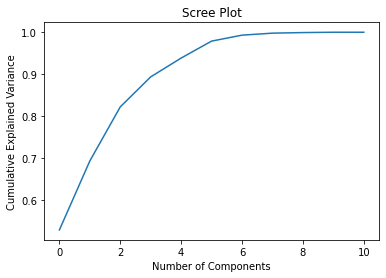

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

data = group_country
# Separate the features from the target variable
X = data.drop(columns=['State'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


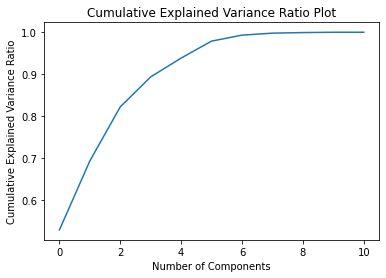

In [21]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio Plot')
plt.show()


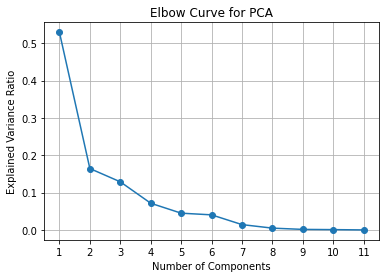

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Scree plot (Elbow curve)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Curve for PCA')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


In [23]:
#From this plot the principal component is 5

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

data = group_country.copy()
# Separate the features from the target variable
X = data.drop(columns=['State'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Principal Component Analysis (PCA)
pca = PCA(n_components=4)  # You can choose the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# # Add the PCA and FA results back to the DataFrame for further analysis
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]
data['PCA3'] = X_pca[:, 2]
data['PCA4'] = X_pca[:, 3]

In [25]:
data

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO  ...        NO2  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  ...   1.000221   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  ...  19.086455   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  ...   9.430829   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  ...   5.856900   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  ...  13.443032   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  ...   3.785320   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  ...   5.405914   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  ...   7.600534   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  ...   7.170762   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  ...   2.295876   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  ...  16.099537   

           O3        SO2        PM25        PM10        NH3      PCA1  \
0   30.433663   0.864985   25.162719   28.445155   4.410782 -1.483336   
1   79.709216  14.555726  148.400321  170.348135  15.250610  5.870036   
2   77.864641  11.925418   60.137722   69.740120   5.963411  0.757352   
3   27.001173   3.313614   29.182716   37.588961   7.370291 -2.614691   
4   33.665561   5.894980   39.290014   45.141472  10.719457 -0.557138   
5   57.365694   1.508877   31.942162   35.108104   1.491881 -2.811012   
6   53.132558   5.117803   61.173185   68.130309   3.772940  1.163535   
7   59.931593   5.227645   29.551619   35.972366   3.103348 -2.163867   
8   53.484754   5.520032   28.069914   34.039956   2.876801 -0.997318   
9   44.430889   1.715696   49.416627   54.546000   2.835613 -2.442224   
10  68.919911  15.009459  112.287653  129.609099  12.095501  5.278662   

        PCA2      PCA3      PCA4  
0   0.505057  2.572206 -0.759590  
1   0.893971 -0.953363  0.852470  
2   0.425393 -0.342576  1.953789  
3  -0.688155 -1.291858  0.029050  
4   3.335245 -1.639682 -1.918161  
5   1.400028  1.257197  1.218453  
6  -1.575675  1.968176 -0.392302  
7  -1.314285 -1.802532  0.659157  
8  -3.019325 -1.059532 -1.054455  
9   0.653725  0.667434  0.160723  
10 -0.615979  0.624529 -0.749133  

[11 rows x 21 columns]

In [26]:
!pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable


In [27]:
data = group_country.copy()

Bartlett's test p-value: 4.273731389172733e-116
KMO score: nan


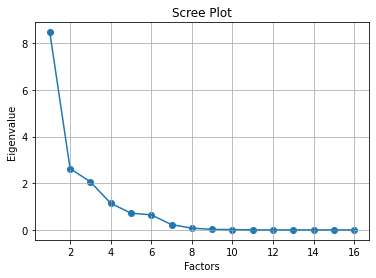

Number of factors to retain (Kaiser's rule): 4


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo


# Drop any rows with missing values
data1 = data.dropna()

# Separate the features from the target variable
X = data1.drop(columns=['State'])

# Calculate Bartlett's test of sphericity and Kaiser-Meyer-Olkin (KMO) test
bartlett_test_value, bartlett_test_p_value = calculate_bartlett_sphericity(X)
kmo_per_variable, kmo_total = calculate_kmo(X)

print("Bartlett's test p-value:", bartlett_test_p_value)
print("KMO score:", kmo_total)

# Initialize factor analysis object
fa = FactorAnalyzer()

# Fit factor analysis on your data
fa.fit(X)

# Get eigenvalues and create scree plot
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Determine the number of factors to retain based on the scree plot
num_factors_to_retain = sum(ev > 1)  # Using Kaiser's rule (eigenvalue > 1)
print("Number of factors to retain (Kaiser's rule):", num_factors_to_retain)


In [29]:
group_country

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO        NO  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  0.016470   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  1.213082   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  0.427740   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  0.155782   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  4.524936   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  0.101559   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  0.170650   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  0.366987   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  0.336609   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  0.035640   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  1.066912   

          NO2         O3        SO2        PM25        PM10        NH3  
0    1.000221  30.433663   0.864985   25.162719   28.445155   4.410782  
1   19.086455  79.709216  14.555726  148.400321  170.348135  15.250610  
2    9.430829  77.864641  11.925418   60.137722   69.740120   5.963411  
3    5.856900  27.001173   3.313614   29.182716   37.588961   7.370291  
4   13.443032  33.665561   5.894980   39.290014   45.141472  10.719457  
5    3.785320  57.365694   1.508877   31.942162   35.108104   1.491881  
6    5.405914  53.132558   5.117803   61.173185   68.130309   3.772940  
7    7.600534  59.931593   5.227645   29.551619   35.972366   3.103348  
8    7.170762  53.484754   5.520032   28.069914   34.039956   2.876801  
9    2.295876  44.430889   1.715696   49.416627   54.546000   2.835613  
10  16.099537  68.919911  15.009459  112.287653  129.609099  12.095501

In [30]:
data1 = group_country.copy()


In [31]:
data1.isnull().sum()

State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
Latitude           0
Longitude          0
CO                 0
NO                 0
NO2                0
O3                 0
SO2                0
PM25               0
PM10               0
NH3                0
dtype: int64

In [32]:
# # Perform Factor Analysis (FA)
fa = FactorAnalysis(n_components=5)
X_fa = fa.fit_transform(X_scaled)

data1['FA1'] = X_fa[:, 0]
data1['FA2'] = X_fa[:, 1]
data1['FA3'] = X_fa[:, 2]
data1['FA4'] = X_fa[:, 3]

In [33]:
data1

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO  ...        NO2  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  ...   1.000221   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  ...  19.086455   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  ...   9.430829   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  ...   5.856900   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  ...  13.443032   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  ...   3.785320   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  ...   5.405914   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  ...   7.600534   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  ...   7.170762   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  ...   2.295876   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  ...  16.099537   

           O3        SO2        PM25        PM10        NH3       FA1  \
0   30.433663   0.864985   25.162719   28.445155   4.410782 -0.680298   
1   79.709216  14.555726  148.400321  170.348135  15.250610  2.312690   
2   77.864641  11.925418   60.137722   69.740120   5.963411  0.065335   
3   27.001173   3.313614   29.182716   37.588961   7.370291 -0.706632   
4   33.665561   5.894980   39.290014   45.141472  10.719457 -0.532829   
5   57.365694   1.508877   31.942162   35.108104   1.491881 -0.756678   
6   53.132558   5.117803   61.173185   68.130309   3.772940  0.332865   
7   59.931593   5.227645   29.551619   35.972366   3.103348 -0.737469   
8   53.484754   5.520032   28.069914   34.039956   2.876801 -0.573962   
9   44.430889   1.715696   49.416627   54.546000   2.835613 -0.368733   
10  68.919911  15.009459  112.287653  129.609099  12.095501  1.645712   

         FA2       FA3       FA4  
0   1.309134 -0.760376 -1.066108  
1  -1.150928 -0.337775 -0.254528  
2  -0.493903 -0.011143  1.741699  
3  -0.539353  0.007578 -1.358897  
4  -0.860436  2.033174 -1.316148  
5  -0.519035 -0.751640  0.808378  
6   1.919933 -0.433952  0.062528  
7  -0.632989  0.510515  1.198845  
8   0.915330  0.969286  0.843517  
9  -0.836842 -1.925553 -0.562031  
10  0.889088  0.699885 -0.097255  

[11 rows x 21 columns]

In [34]:
data.head()

State          Area    Production  Annual_Rainfall    Fertilizer  \
0      Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1      Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2  Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3     Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4    Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   

       Pesticide     Yield   Latitude  Longitude           CO        NO  \
0  484330.656087  1.707122  26.407384  93.255130   374.501098  0.016470   
1  763954.787500  1.719691  25.644085  85.906508  1115.887260  1.213082   
2  246456.509171  1.184263  23.455981  85.255730   523.072173  0.427740   
3   30839.406959  2.268247  10.352874  76.512040   455.278105  0.155782   
4   22770.800000  2.217500  24.720882  93.922939   638.360417  4.524936   

         NO2         O3        SO2        PM25        PM10        NH3  
0   1.000221  30.433663   0.864985   25.162719   28.445155   4.410782  
1  19.086455  79.709216  14.555726  148.400321  170.348135  15.250610  
2   9.430829  77.864641  11.925418   60.137722   69.740120   5.963411  
3   5.856900  27.001173   3.313614   29.182716   37.588961   7.370291  
4  13.443032  33.665561   5.894980   39.290014   45.141472  10.719457

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

data = group_country.copy()
# Separate the features from the target variable
X = data.drop(columns=['State'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Principal Component Analysis (PCA)
pca = PCA(n_components=4)  # You can choose the number of components you want to keep
X_pca = pca.fit_transform(X_scaled)

# # Add the PCA and FA results back to the DataFrame for further analysis
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]
data['PCA3'] = X_pca[:, 2]
data['PCA4'] = X_pca[:, 3]

In [36]:
data

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO  ...        NO2  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  ...   1.000221   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  ...  19.086455   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  ...   9.430829   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  ...   5.856900   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  ...  13.443032   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  ...   3.785320   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  ...   5.405914   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  ...   7.600534   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  ...   7.170762   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  ...   2.295876   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  ...  16.099537   

           O3        SO2        PM25        PM10        NH3      PCA1  \
0   30.433663   0.864985   25.162719   28.445155   4.410782 -1.483336   
1   79.709216  14.555726  148.400321  170.348135  15.250610  5.870036   
2   77.864641  11.925418   60.137722   69.740120   5.963411  0.757352   
3   27.001173   3.313614   29.182716   37.588961   7.370291 -2.614691   
4   33.665561   5.894980   39.290014   45.141472  10.719457 -0.557138   
5   57.365694   1.508877   31.942162   35.108104   1.491881 -2.811012   
6   53.132558   5.117803   61.173185   68.130309   3.772940  1.163535   
7   59.931593   5.227645   29.551619   35.972366   3.103348 -2.163867   
8   53.484754   5.520032   28.069914   34.039956   2.876801 -0.997318   
9   44.430889   1.715696   49.416627   54.546000   2.835613 -2.442224   
10  68.919911  15.009459  112.287653  129.609099  12.095501  5.278662   

        PCA2      PCA3      PCA4  
0   0.505057  2.572206 -0.759590  
1   0.893971 -0.953363  0.852470  
2   0.425393 -0.342576  1.953789  
3  -0.688155 -1.291858  0.029050  
4   3.335245 -1.639682 -1.918161  
5   1.400028  1.257197  1.218453  
6  -1.575675  1.968176 -0.392302  
7  -1.314285 -1.802532  0.659157  
8  -3.019325 -1.059532 -1.054455  
9   0.653725  0.667434  0.160723  
10 -0.615979  0.624529 -0.749133  

[11 rows x 21 columns]

In [37]:
pca_winter = data[["PCA1","PCA2","PCA3","PCA4"]]

In [38]:
pca_winter

PCA1      PCA2      PCA3      PCA4
0  -1.483336  0.505057  2.572206 -0.759590
1   5.870036  0.893971 -0.953363  0.852470
2   0.757352  0.425393 -0.342576  1.953789
3  -2.614691 -0.688155 -1.291858  0.029050
4  -0.557138  3.335245 -1.639682 -1.918161
5  -2.811012  1.400028  1.257197  1.218453
6   1.163535 -1.575675  1.968176 -0.392302
7  -2.163867 -1.314285 -1.802532  0.659157
8  -0.997318 -3.019325 -1.059532 -1.054455
9  -2.442224  0.653725  0.667434  0.160723
10  5.278662 -0.615979  0.624529 -0.749133

In [39]:
pca_winter

PCA1      PCA2      PCA3      PCA4
0  -1.483336  0.505057  2.572206 -0.759590
1   5.870036  0.893971 -0.953363  0.852470
2   0.757352  0.425393 -0.342576  1.953789
3  -2.614691 -0.688155 -1.291858  0.029050
4  -0.557138  3.335245 -1.639682 -1.918161
5  -2.811012  1.400028  1.257197  1.218453
6   1.163535 -1.575675  1.968176 -0.392302
7  -2.163867 -1.314285 -1.802532  0.659157
8  -0.997318 -3.019325 -1.059532 -1.054455
9  -2.442224  0.653725  0.667434  0.160723
10  5.278662 -0.615979  0.624529 -0.749133

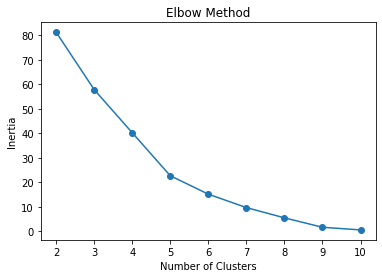

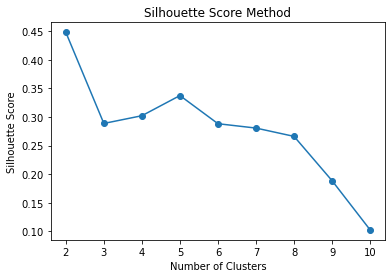

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create a range of cluster numbers to test
cluster_range = range(2, 11)
inertia_values = []
silhouette_scores = []

# Fit KMeans for each cluster number and collect inertia and silhouette score
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pca_winter)
    inertia_values.append(kmeans.inertia_)
    if num_clusters > 1:
        silhouette_scores.append(silhouette_score(pca_winter, kmeans.labels_))

# Plot Elbow Method
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette Score
plt.plot(cluster_range[0:], silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [41]:
# Number of cluster 4

In [42]:
# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(pca_winter)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
pca_winter['Cluster'] = cluster_labels

In [43]:
pca_winter

PCA1      PCA2      PCA3      PCA4  Cluster
0  -1.483336  0.505057  2.572206 -0.759590        2
1   5.870036  0.893971 -0.953363  0.852470        1
2   0.757352  0.425393 -0.342576  1.953789        3
3  -2.614691 -0.688155 -1.291858  0.029050        0
4  -0.557138  3.335245 -1.639682 -1.918161        2
5  -2.811012  1.400028  1.257197  1.218453        2
6   1.163535 -1.575675  1.968176 -0.392302        3
7  -2.163867 -1.314285 -1.802532  0.659157        0
8  -0.997318 -3.019325 -1.059532 -1.054455        0
9  -2.442224  0.653725  0.667434  0.160723        2
10  5.278662 -0.615979  0.624529 -0.749133        1

In [44]:
cluster_pca_winter = pd.concat([data,pca_winter["Cluster"]],axis = 1)

In [45]:
cluster_pca_winter

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO  ...         O3  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  ...  30.433663   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  ...  79.709216   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  ...  77.864641   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  ...  27.001173   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  ...  33.665561   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  ...  57.365694   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  ...  53.132558   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  ...  59.931593   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  ...  53.484754   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  ...  44.430889   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  ...  68.919911   

          SO2        PM25        PM10        NH3      PCA1      PCA2  \
0    0.864985   25.162719   28.445155   4.410782 -1.483336  0.505057   
1   14.555726  148.400321  170.348135  15.250610  5.870036  0.893971   
2   11.925418   60.137722   69.740120   5.963411  0.757352  0.425393   
3    3.313614   29.182716   37.588961   7.370291 -2.614691 -0.688155   
4    5.894980   39.290014   45.141472  10.719457 -0.557138  3.335245   
5    1.508877   31.942162   35.108104   1.491881 -2.811012  1.400028   
6    5.117803   61.173185   68.130309   3.772940  1.163535 -1.575675   
7    5.227645   29.551619   35.972366   3.103348 -2.163867 -1.314285   
8    5.520032   28.069914   34.039956   2.876801 -0.997318 -3.019325   
9    1.715696   49.416627   54.546000   2.835613 -2.442224  0.653725   
10  15.009459  112.287653  129.609099  12.095501  5.278662 -0.615979   

        PCA3      PCA4  Cluster  
0   2.572206 -0.759590        2  
1  -0.953363  0.852470        1  
2  -0.342576  1.953789        3  
3  -1.291858  0.029050        0  
4  -1.639682 -1.918161        2  
5   1.257197  1.218453        2  
6   1.968176 -0.392302        3  
7  -1.802532  0.659157        0  
8  -1.059532 -1.054455        0  
9   0.667434  0.160723        2  
10  0.624529 -0.749133        1  

[11 rows x 22 columns]

In [46]:
cluster_pca_exclude_winter = cluster_pca_winter.drop(columns = ["PCA1","PCA2","PCA3","PCA4"])

In [47]:
cluster_pca_exclude_winter

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO        NO  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  0.016470   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  1.213082   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  0.427740   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  0.155782   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  4.524936   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  0.101559   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  0.170650   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  0.366987   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  0.336609   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  0.035640   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  1.066912   

          NO2         O3        SO2        PM25        PM10        NH3  \
0    1.000221  30.433663   0.864985   25.162719   28.445155   4.410782   
1   19.086455  79.709216  14.555726  148.400321  170.348135  15.250610   
2    9.430829  77.864641  11.925418   60.137722   69.740120   5.963411   
3    5.856900  27.001173   3.313614   29.182716   37.588961   7.370291   
4   13.443032  33.665561   5.894980   39.290014   45.141472  10.719457   
5    3.785320  57.365694   1.508877   31.942162   35.108104   1.491881   
6    5.405914  53.132558   5.117803   61.173185   68.130309   3.772940   
7    7.600534  59.931593   5.227645   29.551619   35.972366   3.103348   
8    7.170762  53.484754   5.520032   28.069914   34.039956   2.876801   
9    2.295876  44.430889   1.715696   49.416627   54.546000   2.835613   
10  16.099537  68.919911  15.009459  112.287653  129.609099  12.095501   

    Cluster  
0         2  
1         1  
2         3  
3         0  
4         2  
5         2  
6         3  
7         0  
8         0  
9         2  
10        1

In [48]:
cluster_pca_exclude_winter['Cluster'] = cluster_pca_exclude_winter['Cluster'].replace({1: 3, 3: 1})

In [49]:
cluster_pca_exclude_winter['Cluster'] = cluster_pca_exclude_winter['Cluster'].replace({1: 2, 2: 1})

In [50]:
yield_ = cluster_pca_exclude_winter.groupby("Cluster").mean()["Yield"]
yield_

Cluster
0    3.005684
1    2.269509
2    1.463737
3    2.047210
Name: Yield, dtype: float64

In [51]:
# Create a mapping between cluster labels and corresponding yield values
cluster_yield_mapping = {
    0: 'low_yield',
    1: 'medium_yield',
    2: 'high_yield',
    3: 'very_high_yield'
}

# Apply the mapping to the cluster labels
cluster_pca_exclude_winter['Yield_Level'] = cluster_pca_exclude_winter['Cluster'].map(cluster_yield_mapping)

In [52]:
cluster_pca_exclude_winter

State          Area    Production  Annual_Rainfall    Fertilizer  \
0         Assam  1.780713e+06  3.068348e+06      2098.563636  2.389519e+08   
1         Bihar  2.812814e+06  5.112276e+06      1129.025000  3.799371e+08   
2     Jharkhand  9.941010e+05  1.193651e+06      1205.985714  1.339540e+08   
3        Kerala  1.188015e+05  2.812964e+05      2884.386364  1.519950e+07   
4       Manipur  7.852000e+04  1.819000e+05      1855.000000  7.757776e+06   
5     Meghalaya  6.260525e+04  1.354961e+05      3697.737784  9.268369e+06   
6        Odisha  3.289660e+06  5.699073e+06      1442.294737  4.612708e+08   
7    Puducherry  1.265300e+04  2.678400e+04      1434.587500  1.442680e+06   
8    Tamil Nadu  1.294311e+06  4.464219e+06       955.733333  2.121838e+08   
9       Tripura  1.484192e+05  4.604602e+05      2556.000000  2.391306e+07   
10  West Bengal  3.986400e+06  9.772000e+06      1721.021739  5.298868e+08   

       Pesticide     Yield   Latitude  Longitude           CO        NO  \
0   4.843307e+05  1.707122  26.407384  93.255130   374.501098  0.016470   
1   7.639548e+05  1.719691  25.644085  85.906508  1115.887260  1.213082   
2   2.464565e+05  1.184263  23.455981  85.255730   523.072173  0.427740   
3   3.083941e+04  2.268247  10.352874  76.512040   455.278105  0.155782   
4   2.277080e+04  2.217500  24.720882  93.922939   638.360417  4.524936   
5   1.691782e+04  2.076851  25.537943  91.299910   360.723783  0.101559   
6   8.832100e+05  1.743211  20.543124  84.689732   431.167345  0.170650   
7   2.657130e+03  2.846667  10.915649  79.806949   374.877323  0.366987   
8   4.752549e+05  3.902140  10.909433  78.366535   383.205528  0.336609   
9   5.379495e+04  3.076563  23.775082  91.702509   397.628916  0.035640   
10  1.075010e+06  2.374730  22.996495  87.685588   863.241207  1.066912   

          NO2         O3        SO2        PM25        PM10        NH3  \
0    1.000221  30.433663   0.864985   25.162719   28.445155   4.410782   
1   19.086455  79.709216  14.555726  148.400321  170.348135  15.250610   
2    9.430829  77.864641  11.925418   60.137722   69.740120   5.963411   
3    5.856900  27.001173   3.313614   29.182716   37.588961   7.370291   
4   13.443032  33.665561   5.894980   39.290014   45.141472  10.719457   
5    3.785320  57.365694   1.508877   31.942162   35.108104   1.491881   
6    5.405914  53.132558   5.117803   61.173185   68.130309   3.772940   
7    7.600534  59.931593   5.227645   29.551619   35.972366   3.103348   
8    7.170762  53.484754   5.520032   28.069914   34.039956   2.876801   
9    2.295876  44.430889   1.715696   49.416627   54.546000   2.835613   
10  16.099537  68.919911  15.009459  112.287653  129.609099  12.095501   

    Cluster      Yield_Level  
0         1     medium_yield  
1         3  very_high_yield  
2         2       high_yield  
3         0        low_yield  
4         1     medium_yield  
5         1     medium_yield  
6         2       high_yield  
7         0        low_yield  
8         0        low_yield  
9         1     medium_yield  
10        3  very_high_yield

# Plot the cluster state wise

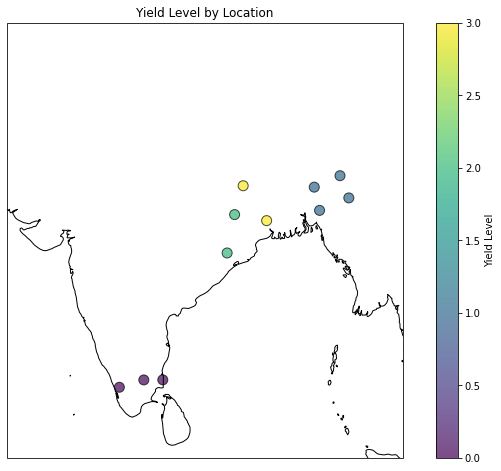

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

data = cluster_pca_exclude_winter.copy()

# Map Yield_Level categories to numerical values
yield_level_mapping = {
    'low_yield': 0,
    'medium_yield': 1,
    'high_yield': 2,
    'very_high_yield': 3
}
data['Yield_Level_Num'] = data['Yield_Level'].map(yield_level_mapping)

# Create a map
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent of the map to cover India
ax.set_extent([68, 98, 5, 38], crs=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Plot data points
scatter = ax.scatter(data['Longitude'], data['Latitude'], c=data['Yield_Level_Num'], cmap='viridis', s=100, alpha=0.7, edgecolors='k')

# Add colorbar
plt.colorbar(scatter, label='Yield Level')

# Add title
plt.title('Yield Level by Location')

# Show plot
plt.show()


In [54]:
##you have to requested to do the regression analysis on this data